# Opencv en Google Colaboratory

# Paso 1: Montar Google Drive en Google colaboratory 


In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Paso 2: Importando librerías necesarias.


In [0]:
import cv2                                  #libreria de opencv
import numpy as np                          #libreria para manejo de arrays 
from matplotlib import pyplot as plt        #libreria para visualizar graficos y otros
from google.colab.patches import cv2_imshow #modulo para visualizar imagenes en google colaboratory


# Paso 3: Cargando y visualizando imágenes.

Image Dimensiones  :  (384, 400, 3)
Alto:  384 ,Ancho:  400 Número de canales: 3


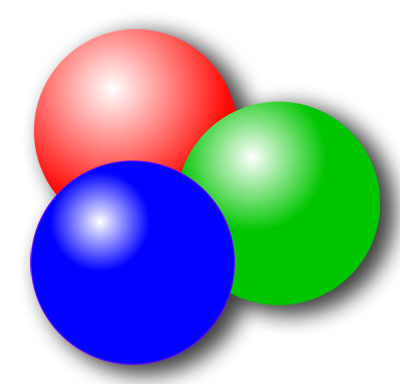

In [3]:
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/imagen1.jpg")
if img.size == 0:
  print("Error: la imagen no fue cargada con exito.")
else:
  print('Image Dimensiones  : ',img.shape)
  print("Alto: ",str(img.shape[0]),",Ancho: ",img.shape[1],"Número de canales:",img.shape[2])
  cv2_imshow(img)

# Paso 4. Aplicando filtros
# Gris (Gray)

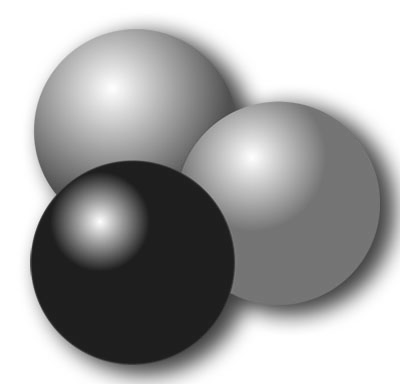

In [0]:
#convirtiendo la imagen a escala de grises
processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#guardando la imagen en drive
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_gray.png', processed_image)
cv2_imshow(processed_image)


# Escala de colores (Channels colors)

In [0]:
#extrayendo el canal rojo (RED channel)
red_channel = img[:,:,2]
#extrayendo el canal verde (Green channel)
green_channel = img[:,:,1]
#extrayendo el canal azul (blue channel)
blue_channel = img[:,:,0]
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_red.png', red_channel)
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_green.png', green_channel)
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_blue.png', blue_channel)


True

# Resaltar saturación de Color es un practica muy común en la clasificación de imágenes

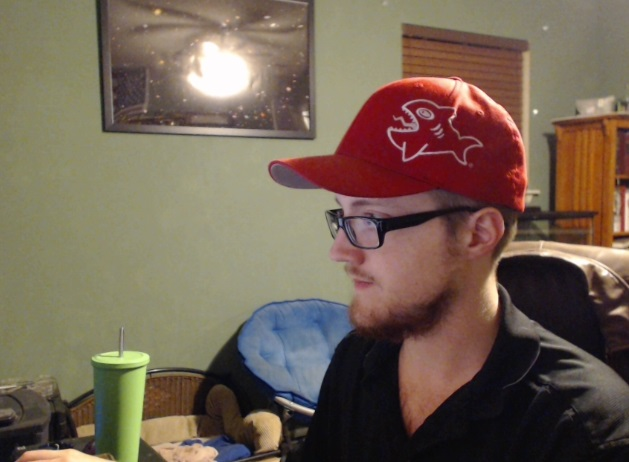

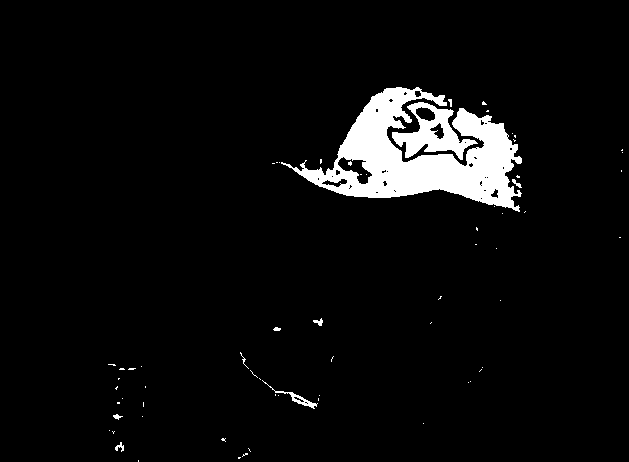

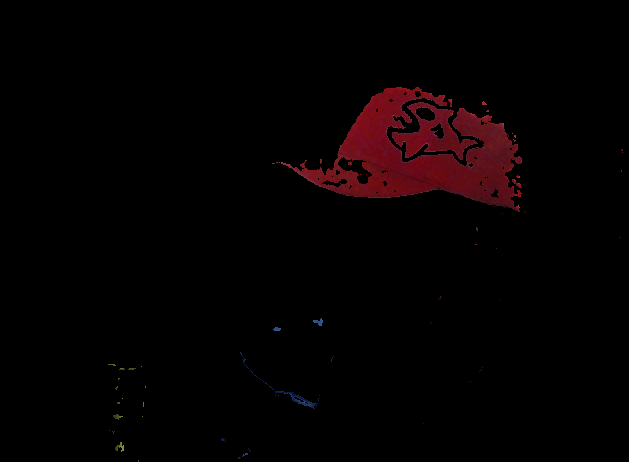

In [0]:
#Cargamos la imagen de la que queremos reslartar el rojo
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/imagen2.jpg")
#convertimos la imagen a gris
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([30,150,50]) # codigo minimo del rojo en del B,G,R
upper_red = np.array([255,255,180]) # codigo maximo del rojo en B,G,R
#Creamos una mascara de la imagen donde resaltaremos el color rojo
mask_red = cv2.inRange(hsv, lower_red, upper_red) 
#aplicamos la mascara en la imagen
img_result = cv2.bitwise_and(img,img, mask = mask_red)
#visualizamos la imagen
cv2_imshow(img)
cv2_imshow(mask_red)
cv2_imshow(img_result)


# Gradiente de Imágenes


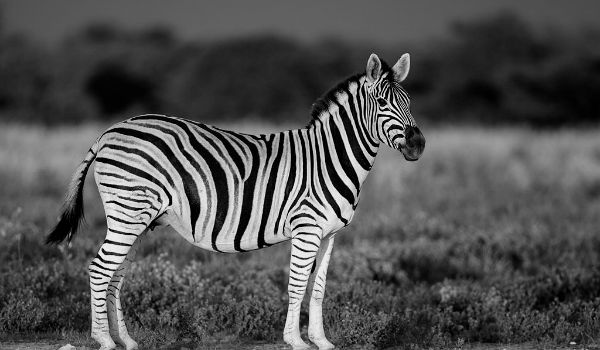

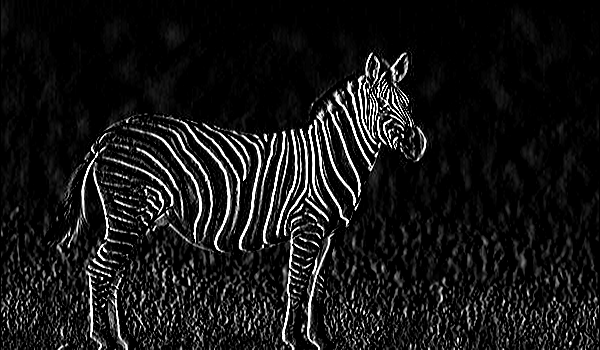

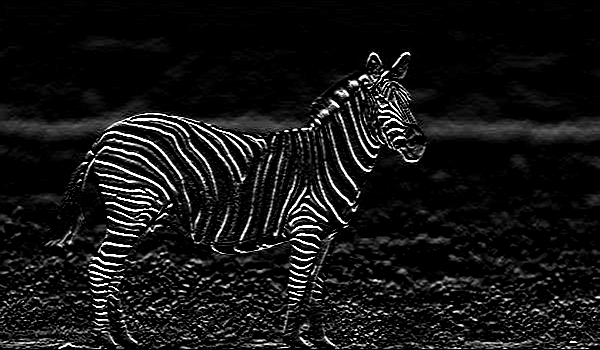

In [21]:
# cargamos la imagen y la pasamos de una a gris
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/cebra.jpg",0)
#cambiar CV_64F  por CV_8U, si quiere verlo en negro/blanco
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
cv2_imshow(img)
cv2_imshow(sobelx)
cv2_imshow(sobely)


# Gradiente de Imágenes mejorado


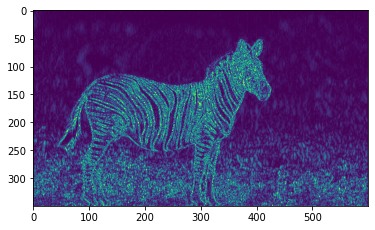

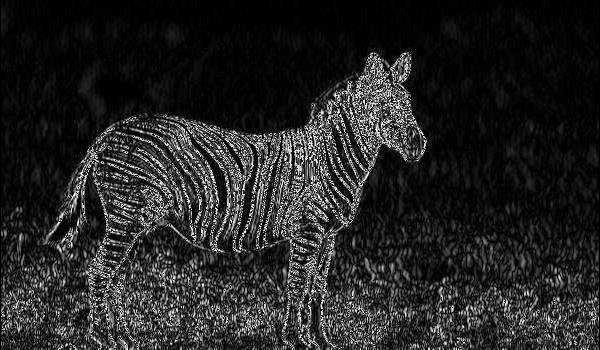

In [22]:
sobelx8u=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
#Utilizando cv2.CV_64F. Luego toma el valor absoluto y hace la conversión a cv2.CV_8U
sobelx64f=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f=np.absolute(sobelx64f)
sobel_8u=np.uint8(abs_sobel64f)
plt.imshow(sobel_8u)
plt.show()
cv2_imshow(sobel_8u)


# Detector de bordes Canny, contando monedas


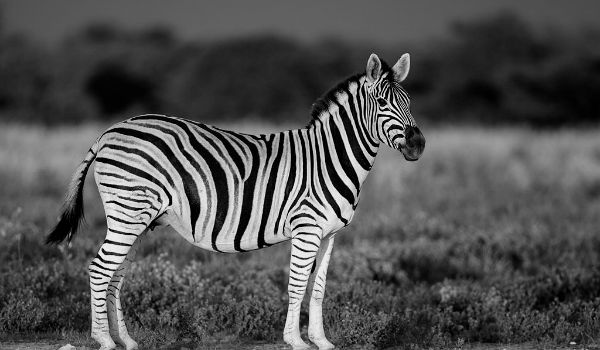

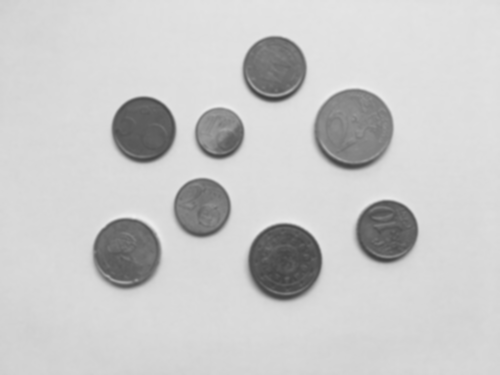

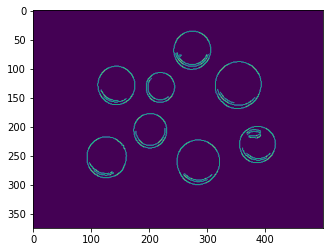

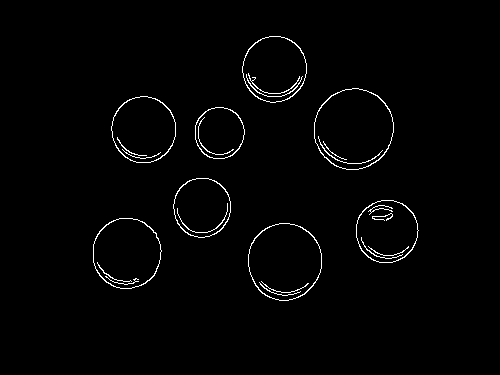

In [23]:
img_gris = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/coins.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 50, 150)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)


# Detector de bordes Canny, contando monedas


In [24]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("He encontrado {} objetos".format(len(contornos)))

He encontrado 8 objetos


# Cantidad de monedas para la imagen coins2.jpg

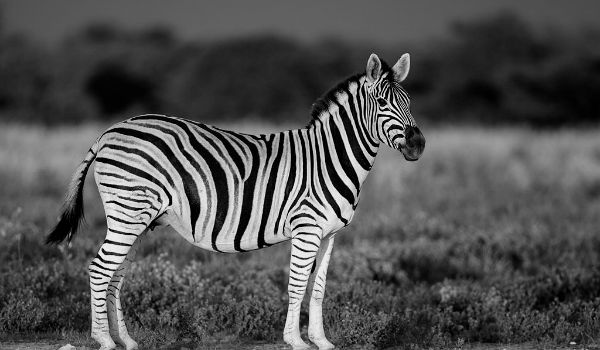

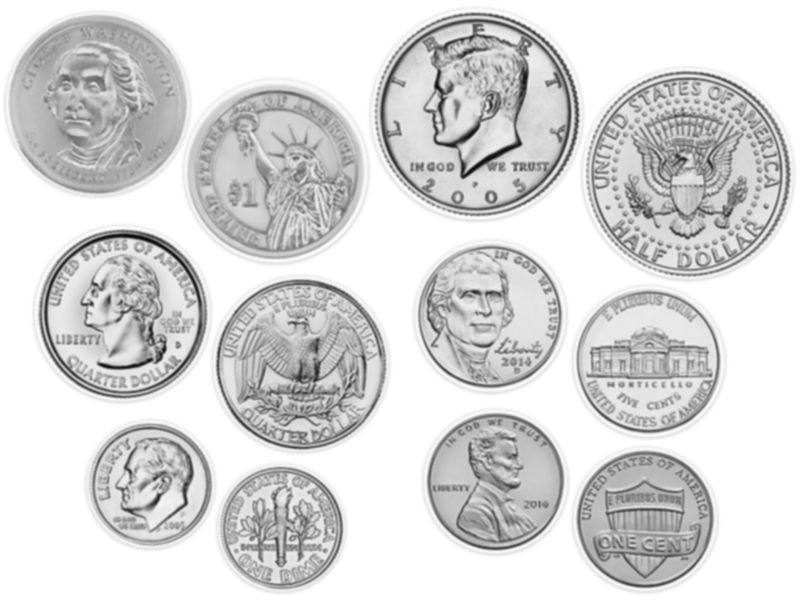

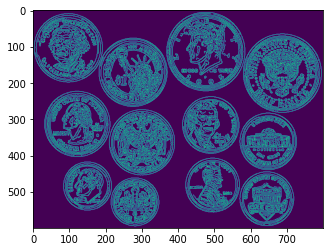

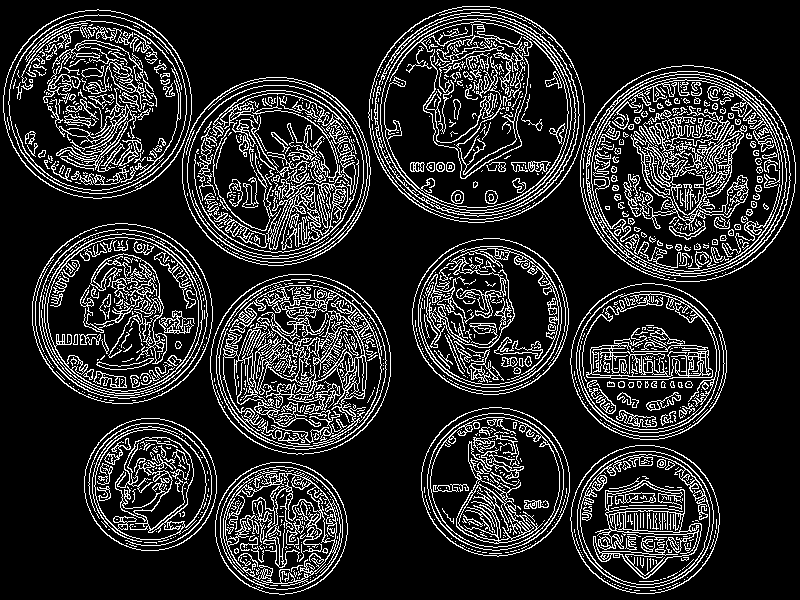

He encontrado 12 objetos


In [25]:
img_gris = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/coins2.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 10, 50)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)

contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("He encontrado {} objetos".format(len(contornos)))

# Cantidad de monedas para la imagen coins3.jpg

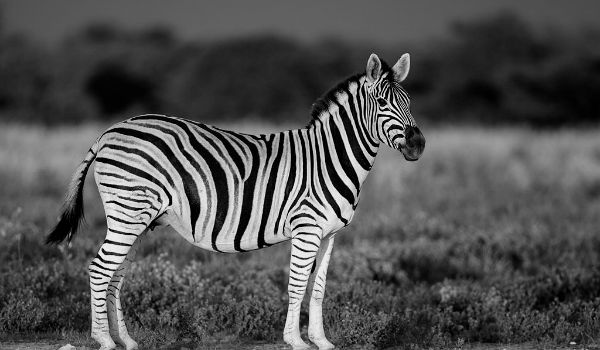

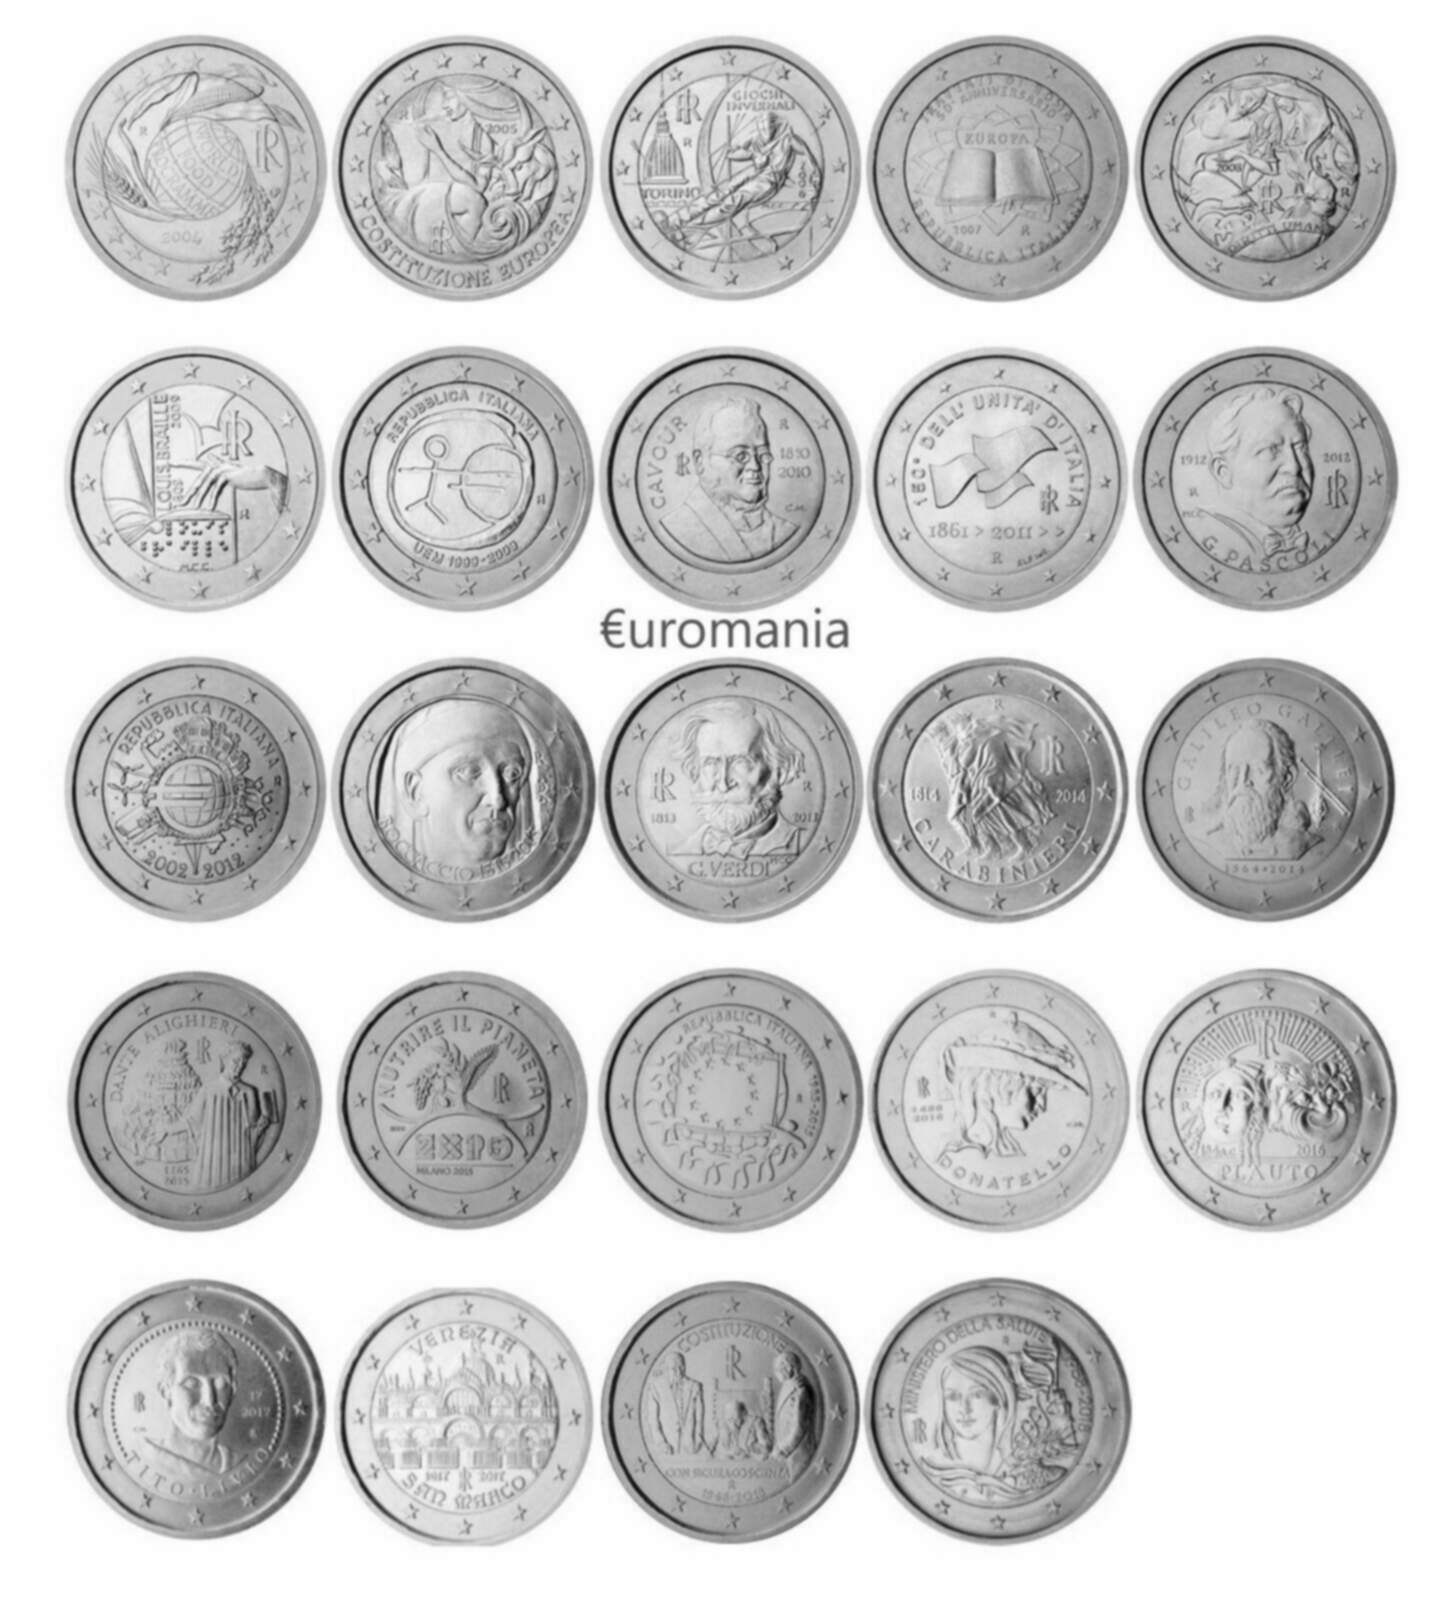

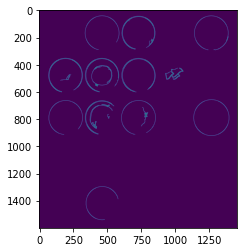

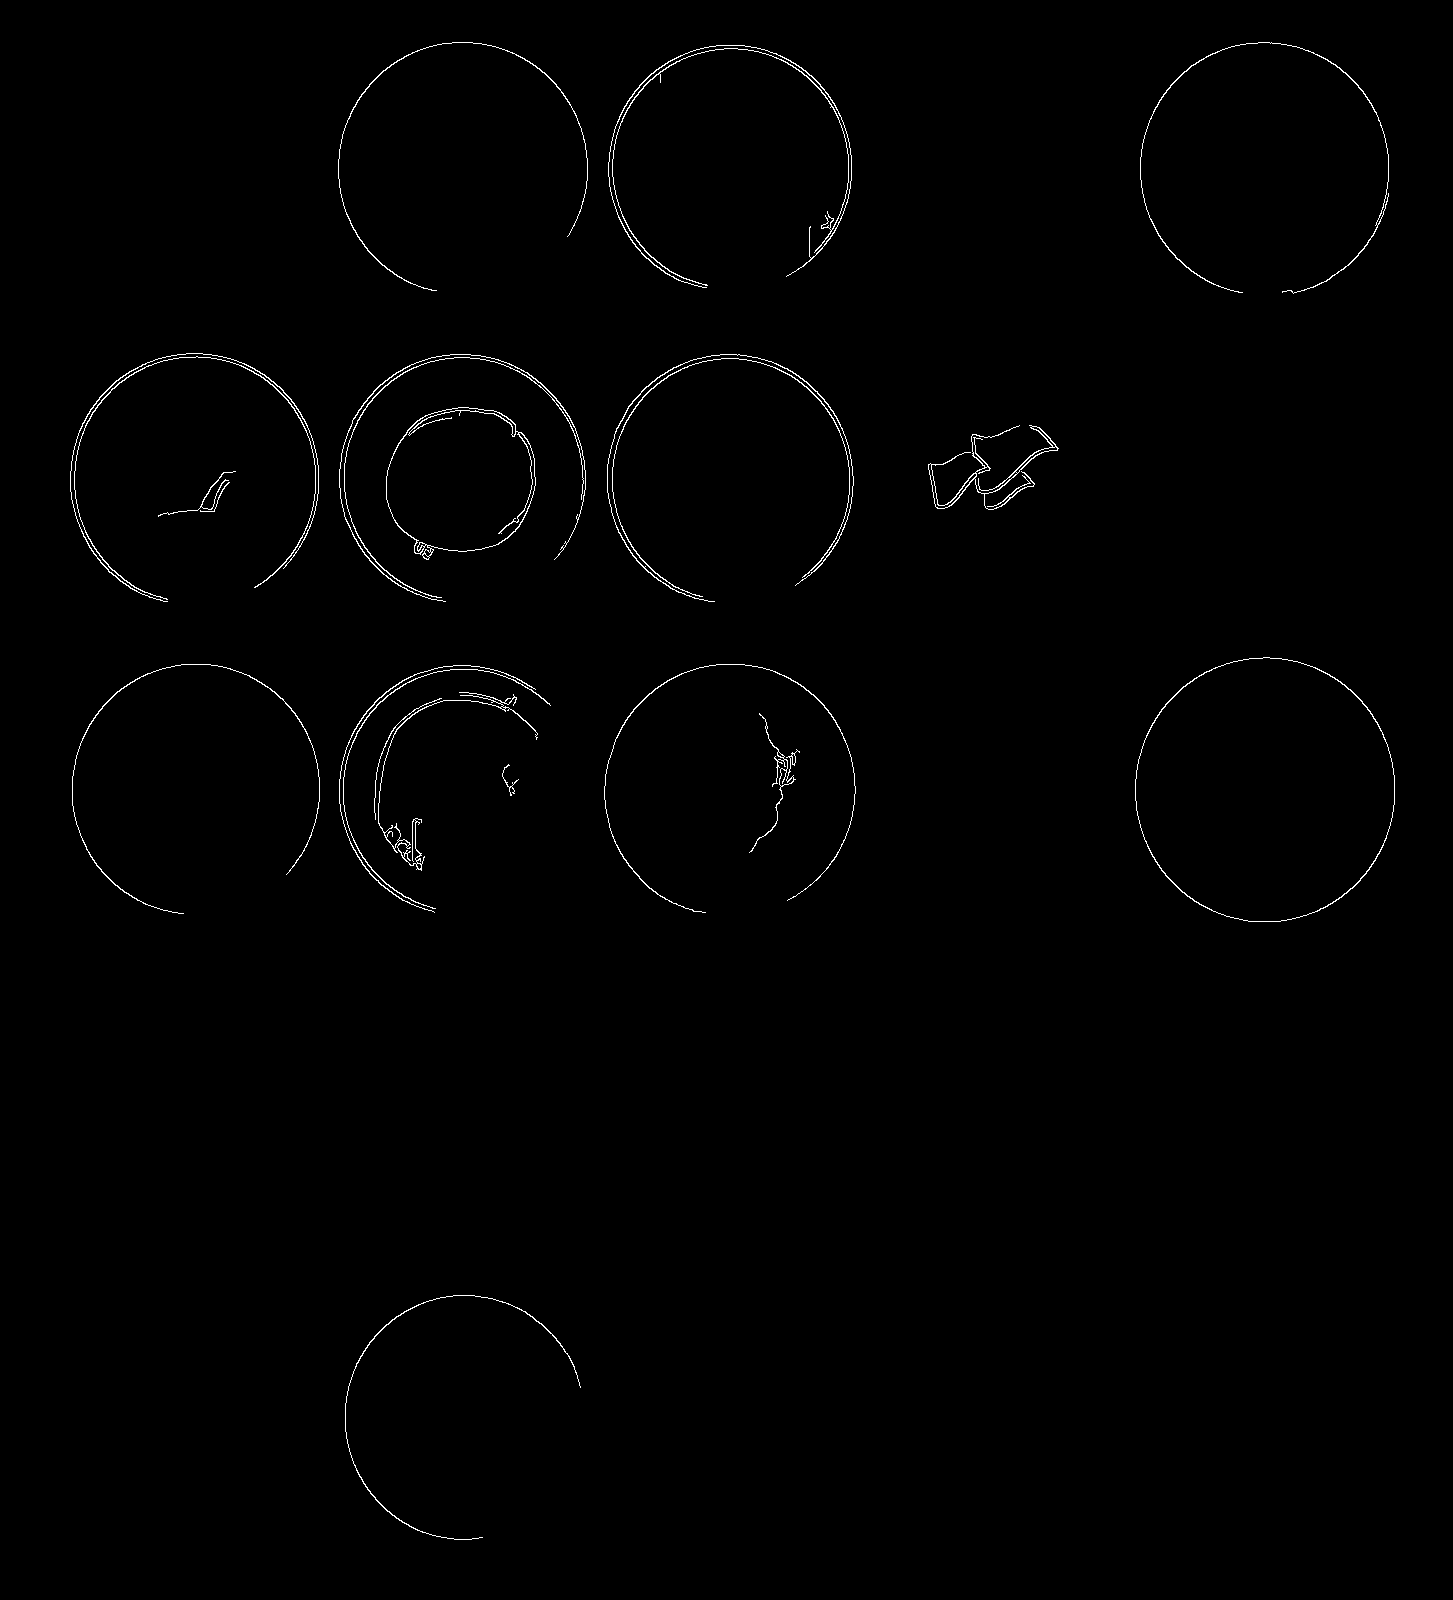

He encontrado 24 objetos


In [28]:
img_gris = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/coins3.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5, 5), 0)
#img_gauss = cv2.GaussianBlur(img_gris, (3, 1), 0)
cv2_imshow(img_gauss)
#img_canny = cv2.Canny(img_gauss, 50, 600)
img_canny = cv2.Canny(img_gauss, 50, 600)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)

contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("He encontrado {} objetos".format(len(contornos)))